In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

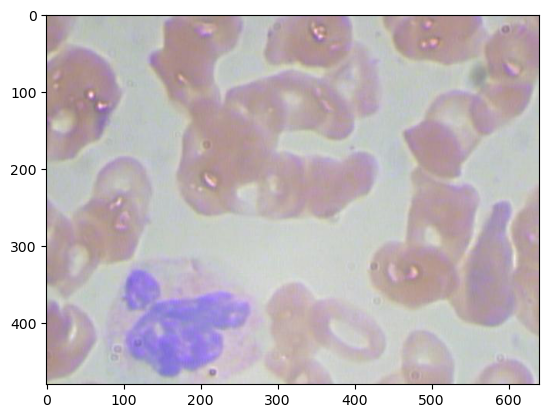

In [50]:
img = cv.imread("RawImgs/BloodImage_00001.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

[120  65 197]


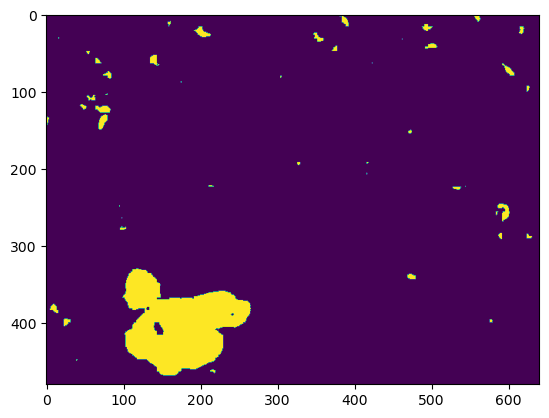

In [51]:
low_color = np.array([55, 55, 152])
high_color = np.array([166, 153, 255])

img2 = cv.cvtColor(img, cv.COLOR_RGB2HSV)

print(img2[400, 180])
mask = cv.inRange(img2, low_color, high_color)
result = cv.bitwise_and(img2, img2, mask=mask)
plt.imshow(mask)

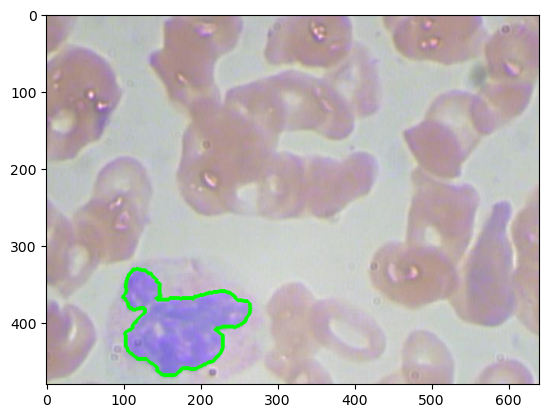

In [58]:
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv.contourArea)
cv.drawContours(img, [largest_contour], -1, (0, 255, 0), 3)

M = cv.moments(largest_contour)
cX = int(M["m10"]/M["m00"])
cY = int(M["m01"]/M["m00"])


         
plt.imshow(img)


In [75]:
largest_contour_X = largest_contour[:,:,0] + (200-cX)
largest_contour_Y = largest_contour[:,:,1] + (200-cY)
largest_contour_trans = np.array(list(zip(largest_contour_X, largest_contour_Y)))

In [102]:

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv.contourArea)

rect = cv.minAreaRect(largest_contour)
box = cv.boxPoints(rect)
box = np.intp(box)

angle = rect[2]
if angle < -45:
    angle += 90
M = cv.getRotationMatrix2D(rect[0], angle, 1)

dst = np.array([])
dsize = 400


cv.warpAffine(largest_contour, dst, M, dsize=[100,100], cv.INTER_LINEAR, cv.BORDER_CONSTANT)
cv.imshow('canvasOutput', dst);
src.delete(); dst.delete(); M.delete();

SyntaxError: positional argument follows keyword argument (3859716904.py, line 17)

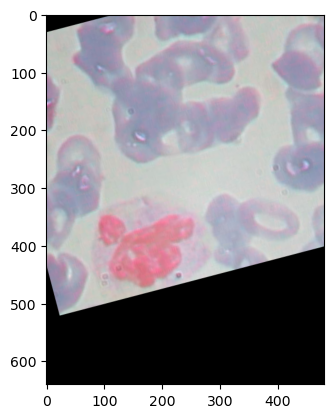

In [127]:
src = cv.imread('RawImgs/BloodImage_00001.jpg');
dst = np.array([]);
dsize = np.array([src.shape[0], src.shape[1]]);

M = cv.getRotationMatrix2D(rect[0], angle, 1)
dst = cv.warpAffine(src, M, dsize);
plt.imshow(dst);

In [118]:
src.shape[1]

640